<img src="./images/coronavirus_icon-1.jpg" style="float: left; margin: 20px; height: 75px">

# **Capstone: Covid-19 Study**

# 2.  EDA

In [19]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Read in Datasets

merged_1 = pd.read_csv('../us_datasets/merged_1.csv')
merged_2 = pd.read_csv('../us_datasets/merged_2.csv')
merged_3 = pd.read_csv('../us_datasets/merged_3.csv')
merged_1_ratio = pd.read_csv('../us_datasets/merged_1_ratio.csv')
time_series_df = pd.read_csv('../us_datasets/time_series_df.csv')

## Create Correlation Heatmaps

### 01-01-2021 dataset Heatmap

In [128]:
# View merge_1 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3013 non-null   int64  
 1   school_closing                     3013 non-null   float64
 2   workplace_closing                  3013 non-null   float64
 3   cancel_public_events               3013 non-null   float64
 4   restrictions_on_gatherings         3013 non-null   float64
 5   public_transport_closing           3013 non-null   float64
 6   stay_at_home_requirements          3013 non-null   float64
 7   restrictions_on_internal_movement  3013 non-null   float64
 8   international_travel_controls      3013 non-null   float64
 9   income_support                     3013 non-null   float64
 10  debt_relief                        3013 non-null   float64
 11  public_information_campaigns       3013 non-null   float

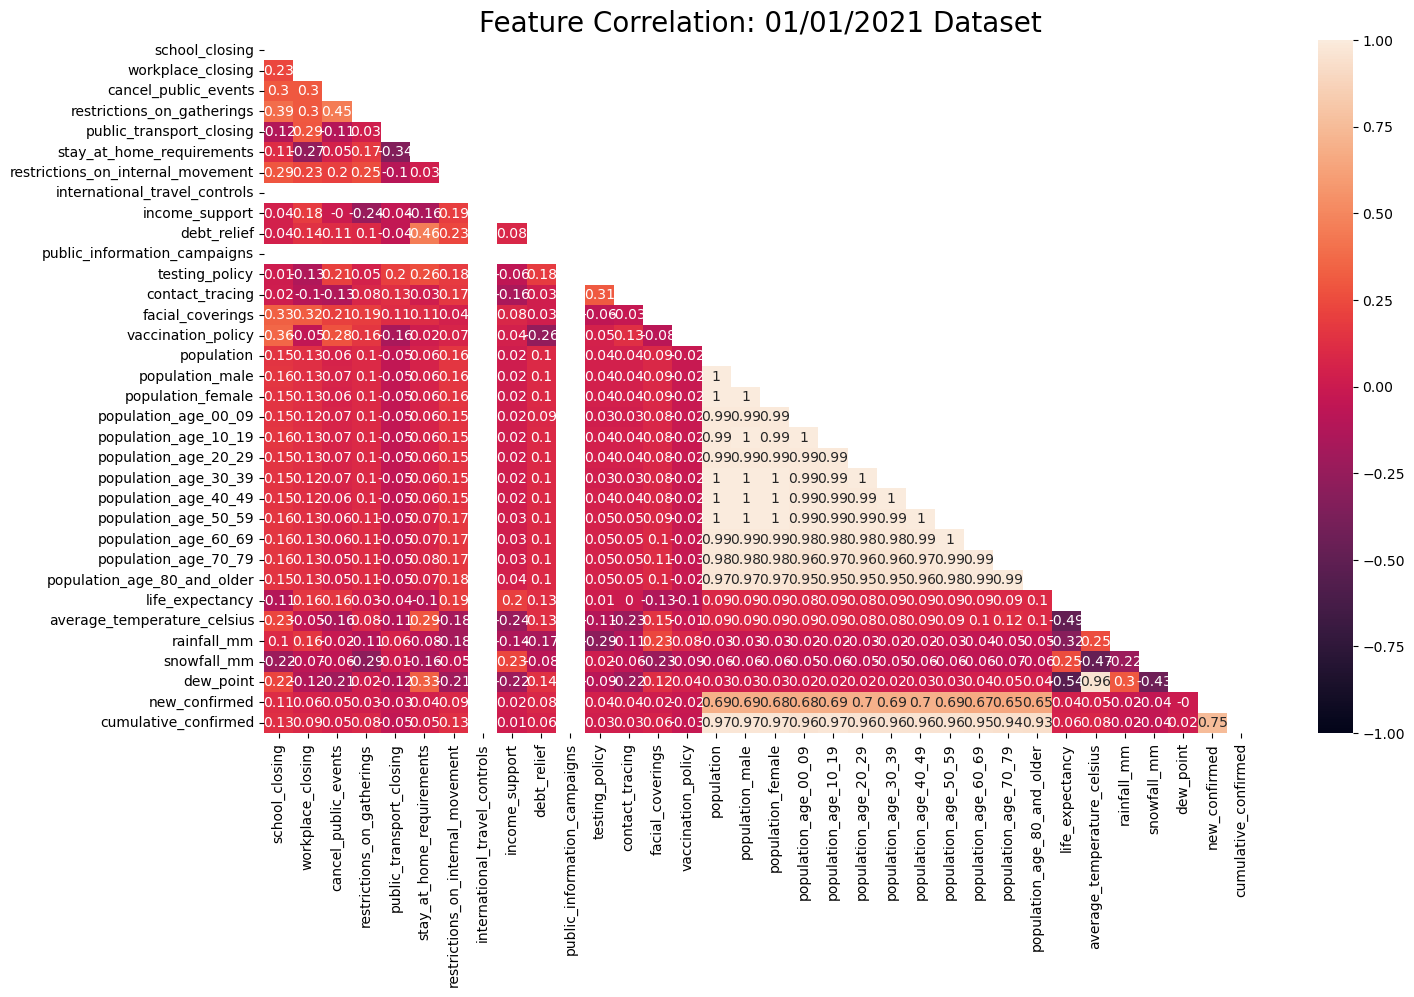

In [48]:
#  Create heatmap to optimize feature selection

merged_1_corr = merged_1.drop(columns = ['Unnamed: 0','new_deceased', 'cumulative_deceased'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           mask = mask,
           annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset', size = 20);

**Drop highly correlated features, such as the age buckets, and features displaying blanks**

In [35]:
# research feature showing blank in correlation plot

merged_1_corr.international_travel_controls.value_counts()

international_travel_controls
3.0    3013
Name: count, dtype: int64

In [36]:
# research feature showing blank in correlation plot

merged_1_corr.public_information_campaigns.value_counts()

public_information_campaigns
2.0    3013
Name: count, dtype: int64

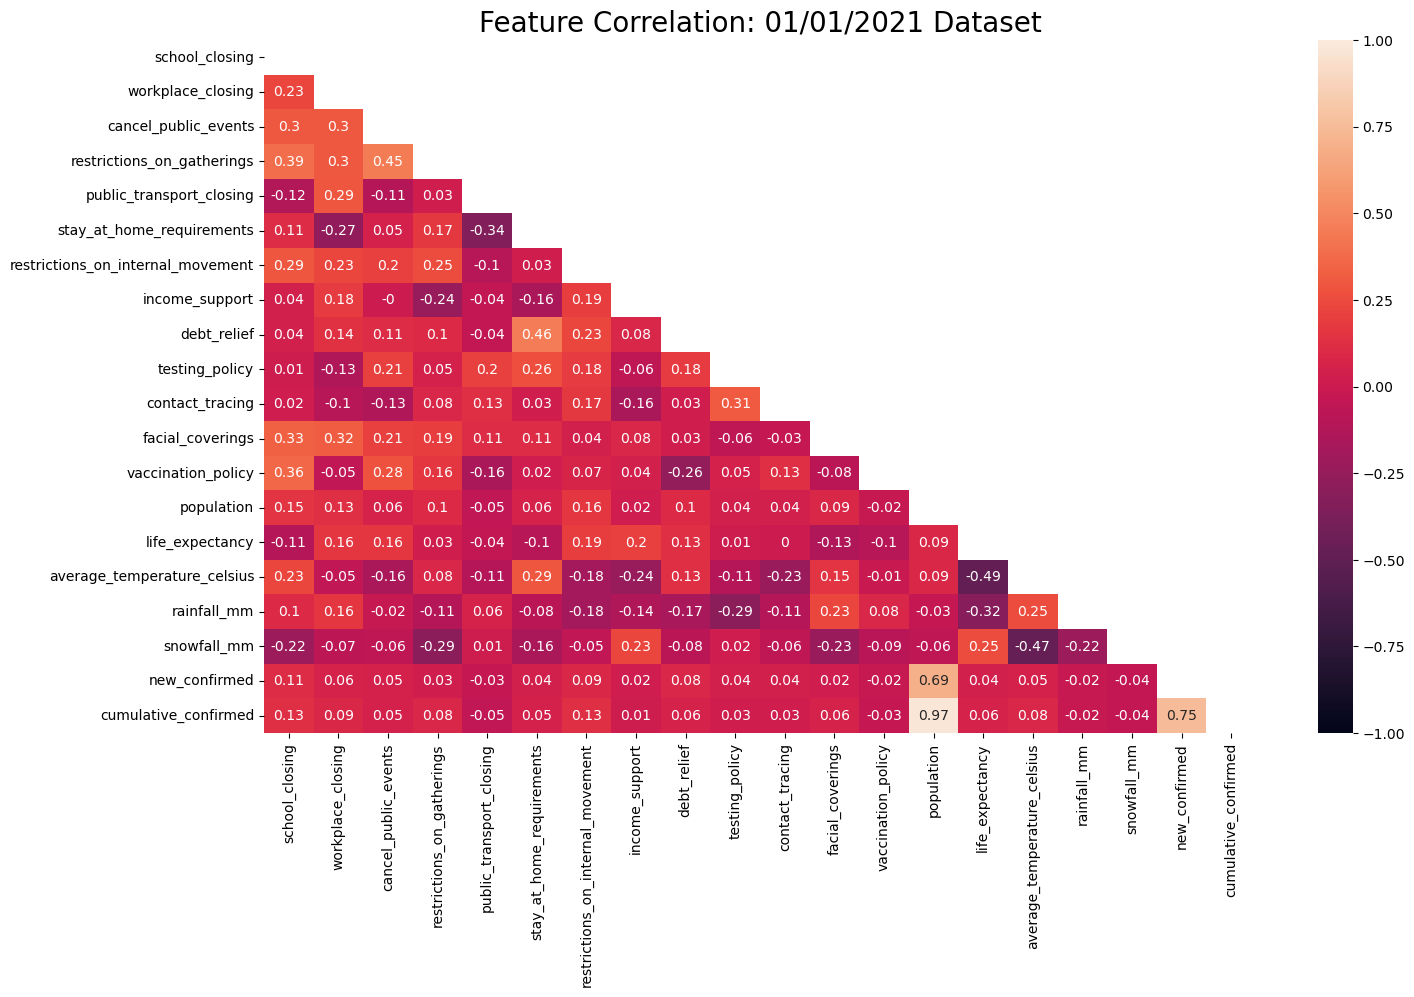

In [4]:
# Drop unnecessary features

merged_1_corr = merged_1.drop(columns = ['Unnamed: 0', 'new_deceased', 'dew_point','cumulative_deceased', 'international_travel_controls',  
                                         'public_information_campaigns','population_male','population_female','population_age_00_09',
                                         'population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49',
                                         'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset', size = 20);   

**Correlation plot on pre-vaccine dataset is showing very high correlation with population and little correlation with everythin else.**

In [7]:
# Save dataframe for modeling

merged_1_corr.to_csv('../us_datasets/merged_1_corr.csv')

### 01-01-2021 Ratio dataset Heatmap

In [59]:
# Check merged_1_ratio columns

merged_1_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3013 non-null   int64  
 1   school_closing                     3013 non-null   float64
 2   workplace_closing                  3013 non-null   float64
 3   cancel_public_events               3013 non-null   float64
 4   restrictions_on_gatherings         3013 non-null   float64
 5   public_transport_closing           3013 non-null   float64
 6   stay_at_home_requirements          3013 non-null   float64
 7   restrictions_on_internal_movement  3013 non-null   float64
 8   international_travel_controls      3013 non-null   float64
 9   income_support                     3013 non-null   float64
 10  debt_relief                        3013 non-null   float64
 11  public_information_campaigns       3013 non-null   float

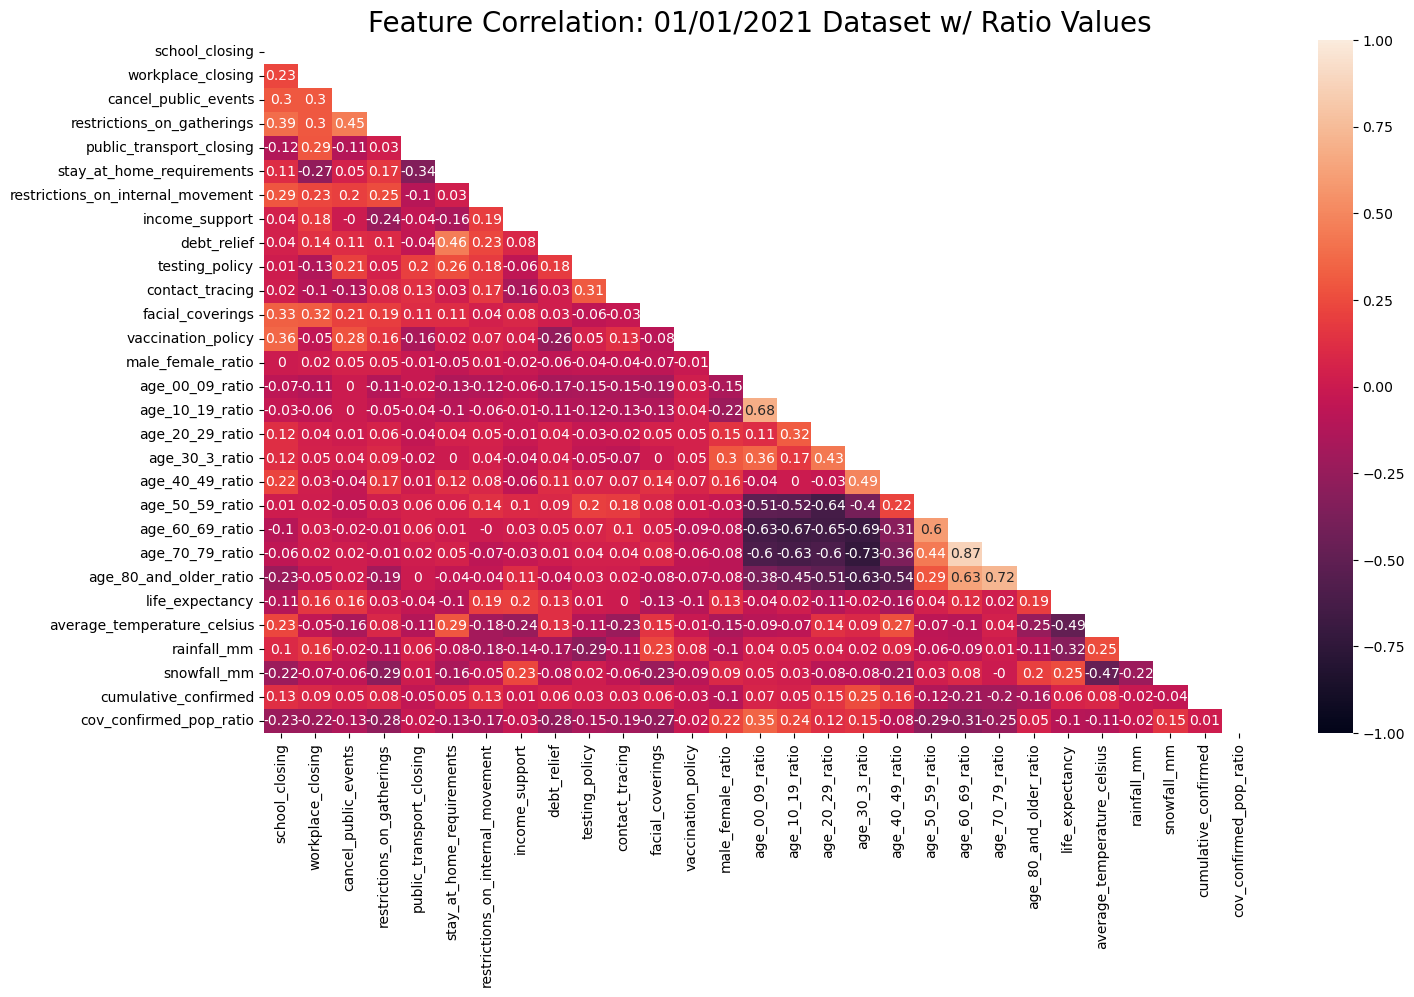

In [31]:
#  Create heatmap to optimize feature selection

merged_1_corr_ratio = merged_1_ratio.drop(columns = ['Unnamed: 0', 'new_confirmed', 'new_deceased', 'dew_point', 
                                                     'cumulative_deceased', 'international_travel_controls', 
                                                     'public_information_campaigns','deceased_pop_ratio'])
plt.figure(figsize = (16, 9))
corr = round(merged_1_corr_ratio.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
           vmin = -1,
           vmax = 1,
           mask = mask,
           annot = True);
plt.title('Feature Correlation: 01/01/2021 Dataset w/ Ratio Values', size = 20);

In [ ]:
# Save dataframe for modeling

merged_1_corr_ratio.to_csv('../us_datasets/merged_1_corr_ratio.csv')

### 09-01-2021 dataset Heatmap

In [40]:
# View merge_2 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3012 non-null   int64  
 1   school_closing                       3012 non-null   float64
 2   workplace_closing                    3012 non-null   float64
 3   cancel_public_events                 3012 non-null   float64
 4   restrictions_on_gatherings           3012 non-null   float64
 5   public_transport_closing             3012 non-null   float64
 6   stay_at_home_requirements            3012 non-null   float64
 7   restrictions_on_internal_movement    3012 non-null   float64
 8   international_travel_controls        3012 non-null   float64
 9   income_support                       3012 non-null   float64
 10  debt_relief                          3012 non-null   float64
 11  public_information_campaigns  

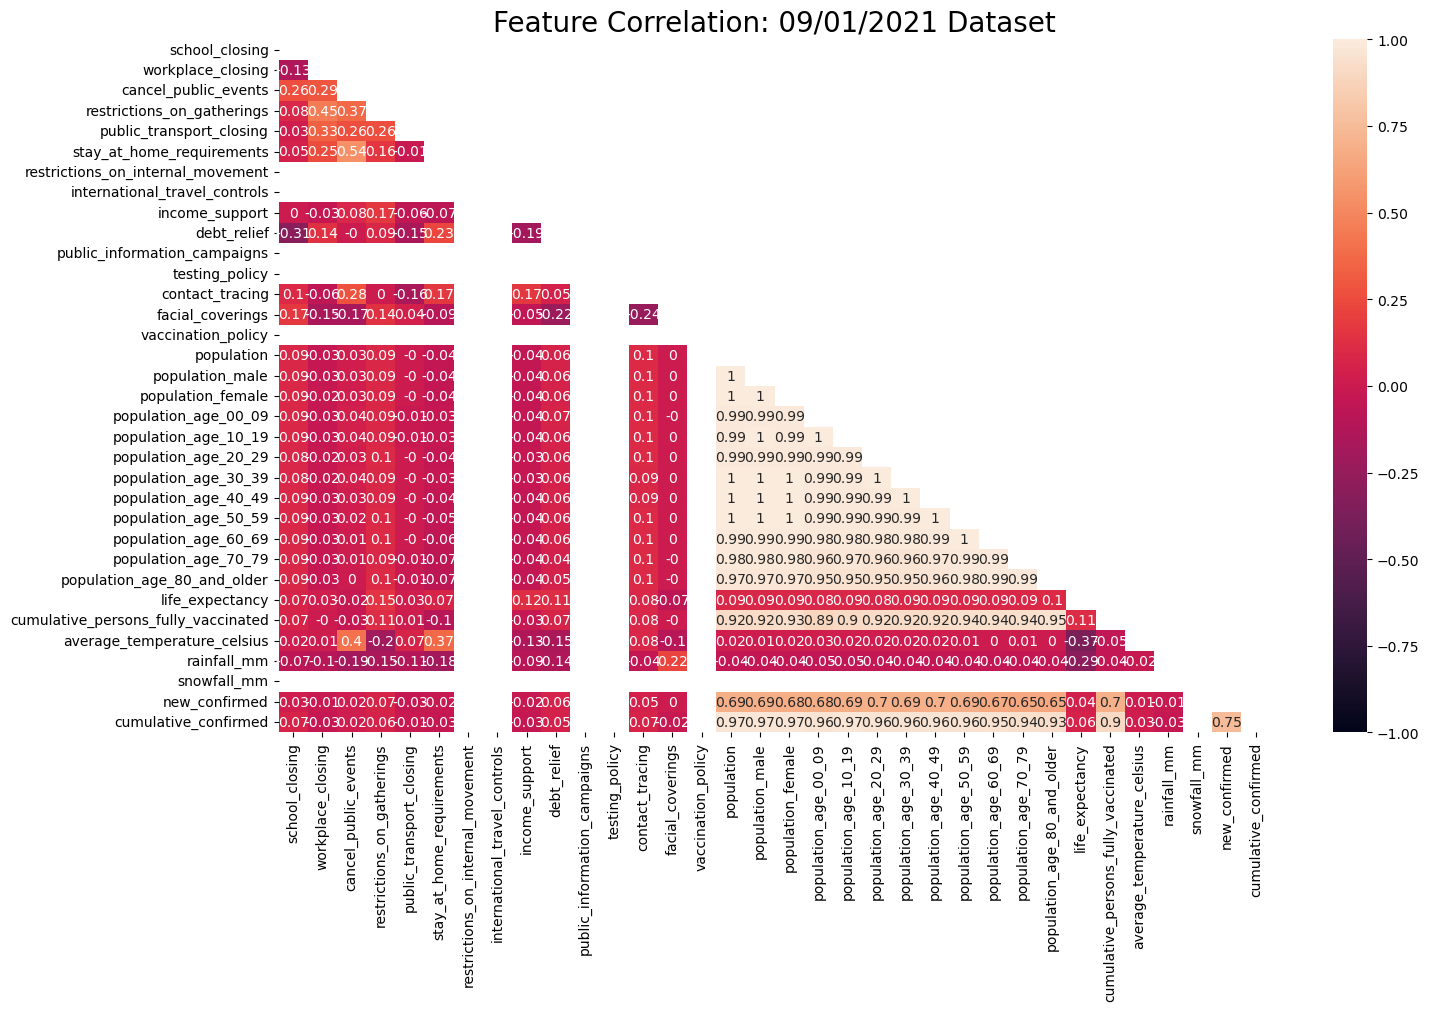

In [51]:
# Drop unnecessary features

merged_2_corr = merged_2.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point'])
plt.figure(figsize = (16, 9))
corr = round(merged_2_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 09/01/2021 Dataset', size = 20);

**Drop highly correlated features, such as the age buckets, and features displaying blanks**

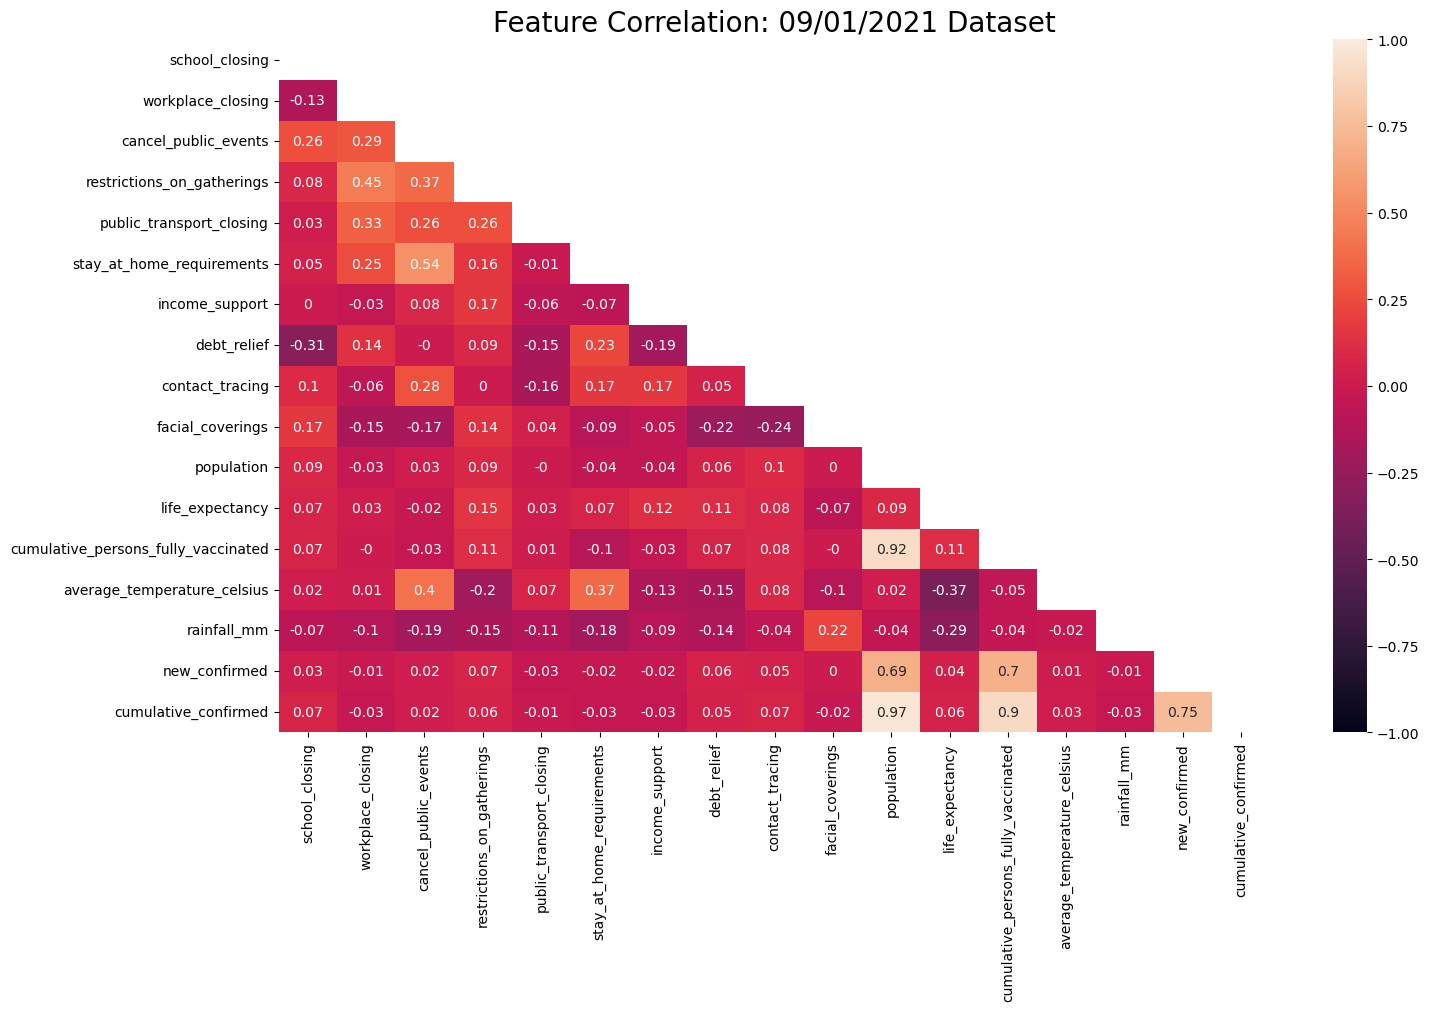

In [5]:
# Drop unnecessary features per above heatmap

merged_2_corr = merged_2.drop(columns = ['Unnamed: 0','new_deceased', 'cumulative_deceased','dew_point', 'restrictions_on_internal_movement',
                                         'international_travel_controls', 'public_information_campaigns','testing_policy', 'vaccination_policy', 
                                         'snowfall_mm','population_male','population_female','population_age_00_09','population_age_10_19',
                                         'population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59',
                                         'population_age_60_69','population_age_70_79','population_age_80_and_older'])
plt.figure(figsize = (16, 9))
corr = round(merged_2_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 09/01/2021 Dataset', size = 20);

**Correlation plot on post-vaccine dataset is showing very high correlation with population and cumulative_persons_fully_vaccinated with little correlation to anything else.**

In [8]:
# Save dataframe for modeling

merged_2_corr.to_csv('../us_datasets/merged_2_corr.csv')

### 05-13-2022 dataset Heatmap

In [54]:
# View merge_3 info() to identify target variable and drop unnecessary features for inferential linear regression modeling

merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3013 non-null   int64  
 1   school_closing                       3013 non-null   float64
 2   workplace_closing                    3013 non-null   float64
 3   cancel_public_events                 3013 non-null   float64
 4   restrictions_on_gatherings           3013 non-null   float64
 5   public_transport_closing             3013 non-null   float64
 6   stay_at_home_requirements            3013 non-null   float64
 7   restrictions_on_internal_movement    3013 non-null   float64
 8   international_travel_controls        3013 non-null   float64
 9   income_support                       3013 non-null   float64
 10  debt_relief                          3013 non-null   float64
 11  public_information_campaigns  

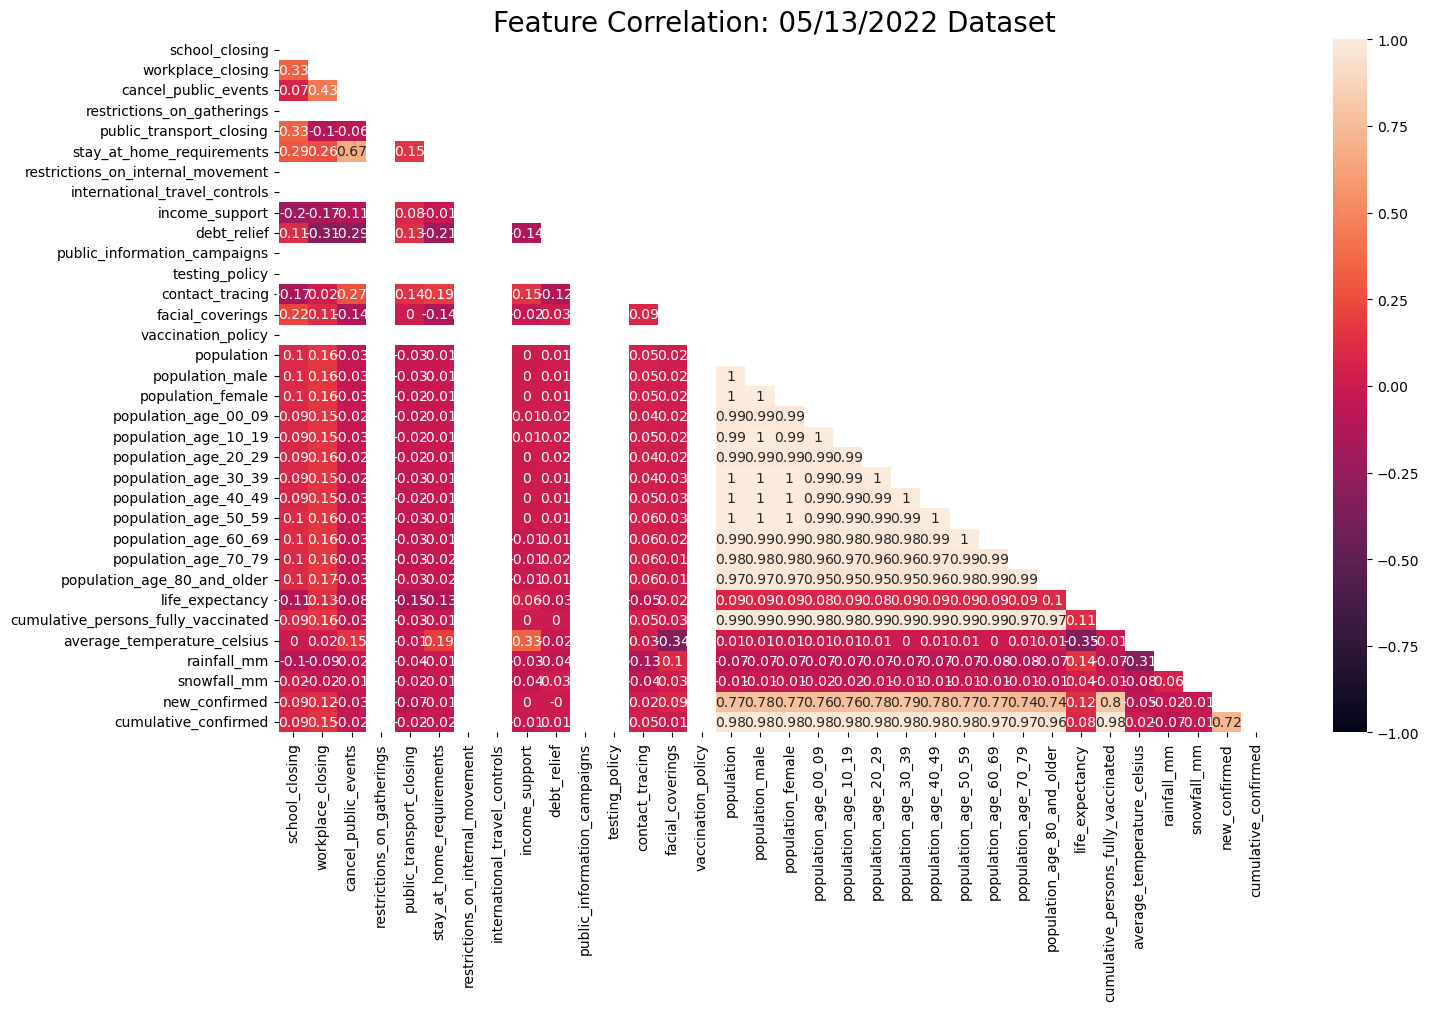

In [55]:
# Drop unnecessary features

merged_3_corr = merged_3.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point'])
plt.figure(figsize = (16, 9))
corr = round(merged_3_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 05/13/2022 Dataset', size = 20);

**Drop highly correlated features, such as the age buckets, and features displaying blanks**

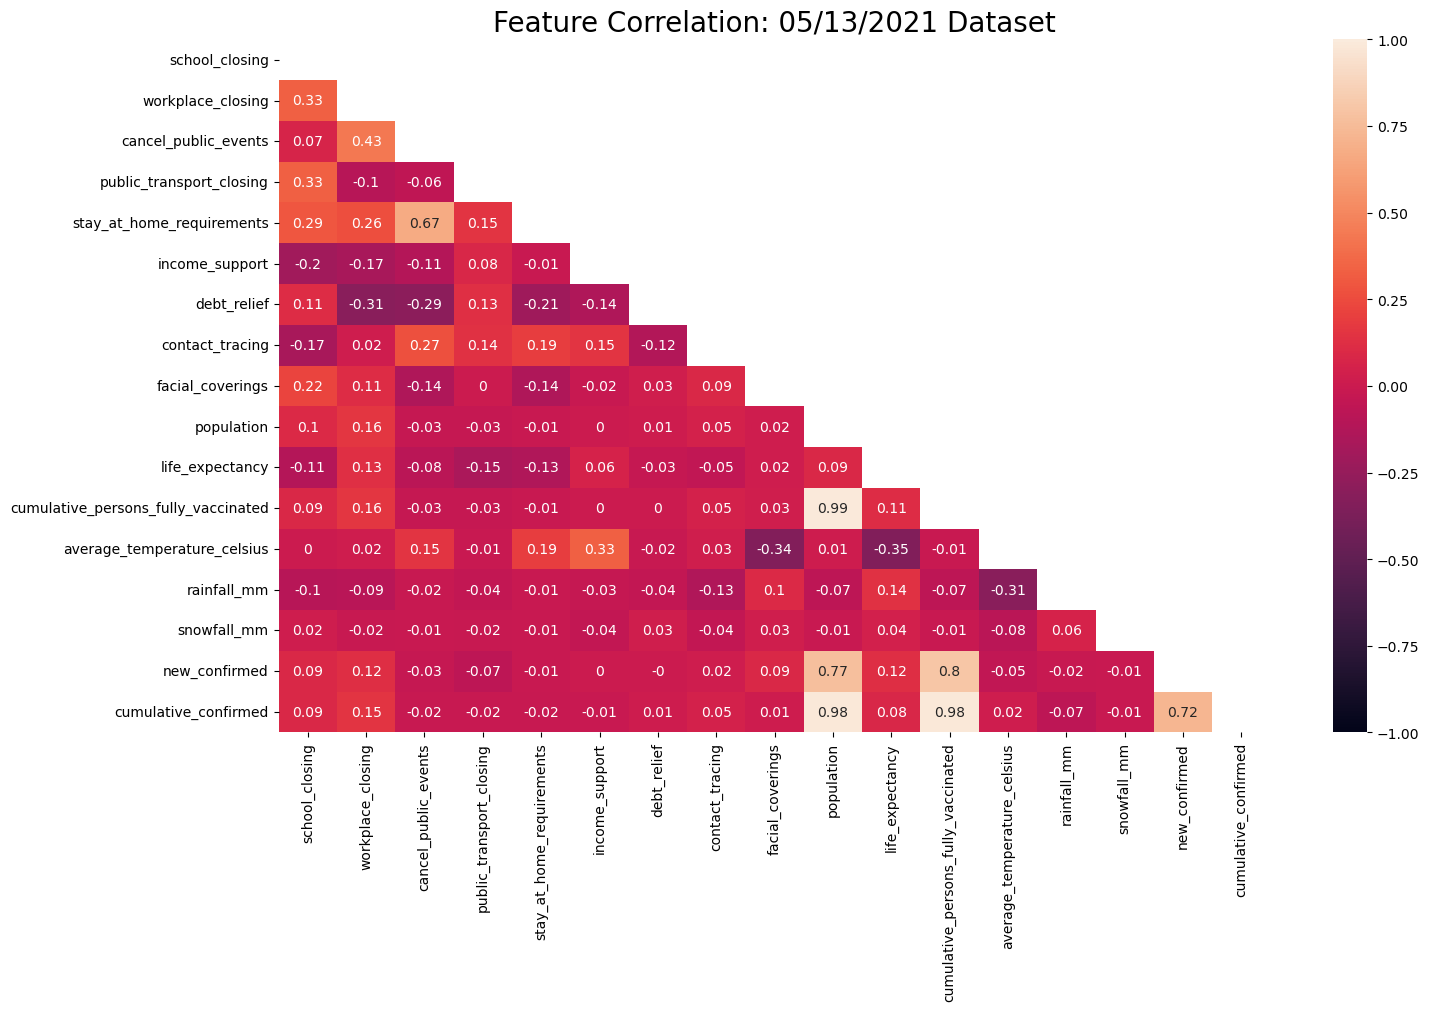

In [6]:
# Drop unnecessary features per above heatmap

merged_3_corr = merged_3.drop(columns = ['Unnamed: 0', 'new_deceased', 'cumulative_deceased', 'dew_point','restrictions_on_internal_movement',
                                         'international_travel_controls', 'public_information_campaigns', 'testing_policy', 'vaccination_policy', 
                                         'restrictions_on_gatherings','population_male','population_female','population_age_00_09',
                                         'population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49',
                                         'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older'])
plt.figure(figsize = (16, 9))
corr = round(merged_3_corr.corr(numeric_only = True), 2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            vmin = -1,
            vmax = 1,
            mask = mask,
            annot = True);
plt.title('Feature Correlation: 05/13/2021 Dataset', size = 20);

**Correlation plot on post-vaccine dataset is showing very high correlation with population and cumulative_persons_fully_vaccinated with little correlation to anything else.**

In [9]:
# Save dataframe for modeling

merged_3_corr.to_csv('../us_datasets/merged_3_corr.csv')

### Explore time series

In [21]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128133 entries, 0 to 1128132
Data columns (total 40 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   location_key                         1128133 non-null  object 
 1   date_x                               1128133 non-null  object 
 2   cumulative_persons_fully_vaccinated  1128133 non-null  float64
 3   vax_pop_ratio                        1128133 non-null  float64
 4   average_temperature_celsius          1128133 non-null  float64
 5   rainfall_mm                          1128133 non-null  float64
 6   snowfall_mm                          1128133 non-null  float64
 7   relative_humidity                    1128133 non-null  float64
 8   cumulative_confirmed                 1128133 non-null  float64
 9   cumulative_deceased                  1128133 non-null  float64
 10  cov_confirmed_pop_ratio              1128133 non-null  float64
 11

In [73]:
# group time series by date to plot cases and vaccinations for the US

df_cov = time_series_df.groupby('date_x')[['cumulative_confirmed', 'cumulative_deceased', 'cumulative_persons_fully_vaccinated']].sum()
df_cov

,cumulative_confirmed,cumulative_deceased,cumulative_persons_fully_vaccinated
date_x,,,
2021-05-02,31153617.0,558218.0,82636140.0
2021-05-03,31201674.0,558640.0,84367558.0
2021-05-04,31240657.0,559503.0,84877814.0
2021-05-05,31286236.0,560257.0,85812929.0
2021-05-06,31331232.0,561075.0,87119289.0
...,...,...,...
2022-05-08,78187670.0,961735.0,200458036.0
2022-05-09,78277257.0,962055.0,200481490.0
2022-05-10,78348850.0,962349.0,200535211.0


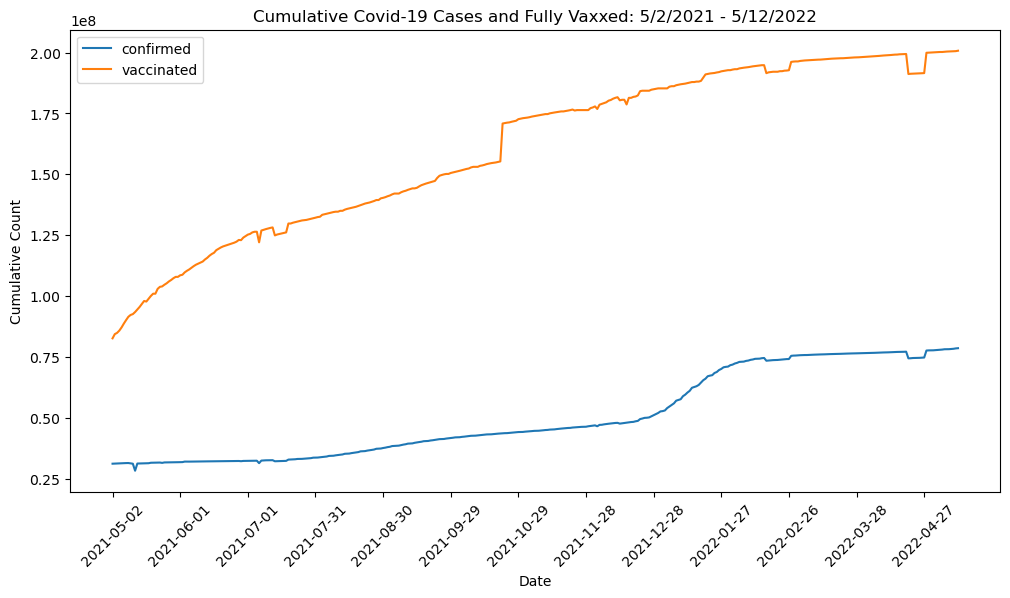

In [124]:
# Plot US covid cases and fully vaxxed numbers

plt.figure(figsize = (12, 6))
plt.plot(df_cov.index, df_cov.cumulative_confirmed,label = 'confirmed')
plt.plot(df_cov.index, df_cov.cumulative_persons_fully_vaccinated, label = 'vaccinated')
plt.title('Cumulative Covid-19 Cases and Fully Vaxxed: 5/2/2021 - 5/12/2022')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.xticks(df_cov.index[::30], rotation = 45)
plt.legend();
plt.savefig('./images/time_series_cases_vax')

**This plot shows the uptake in vaccines since they were introduced in late 2020.  Also, there is a sharp increase in confirmed Covid cases over the winter season.  This was expected as it is the normal flu season and people tend to spend more time indoors during the winter inceasing transmissibility vectors.**

In [60]:
# Create state column

time_series_df['state'] = time_series_df.location_key.str[3:5]

In [61]:
time_series_df.head()

,location_key,date_x,cumulative_persons_fully_vaccinated,vax_pop_ratio,average_temperature_celsius,rainfall_mm,snowfall_mm,relative_humidity,cumulative_confirmed,cumulative_deceased,...,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,state
0,US_AK_02013,2021-05-02,982.0,0.284226,5.155556,3.189111,0.0,87.121864,364.0,3.0,...,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,5.0,AK
1,US_AK_02013,2021-05-03,984.0,0.284805,1.805556,9.107714,0.0,79.423306,364.0,3.0,...,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,5.0,AK
2,US_AK_02013,2021-05-04,984.0,0.284805,3.500000,1.451429,0.0,78.093021,364.0,3.0,...,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,5.0,AK
3,US_AK_02013,2021-05-05,987.0,0.285673,4.066667,0.025400,0.0,77.454996,364.0,3.0,...,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,5.0,AK
4,US_AK_02013,2021-05-06,991.0,0.286831,4.550000,0.056444,0.0,74.417501,364.0,3.0,...,1.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,5.0,AK


In [79]:
# Pull out final data per state

df_cov_state = time_series_df.groupby(['date_x','state'])[['cumulative_confirmed', 'cumulative_deceased', 'cumulative_persons_fully_vaccinated', 
                                                           'population']].sum()
df_cov_state

cumulative_confirmed  cumulative_deceased  \
date_x     state                                              
2021-05-02 AK                  65034.0                322.0   
           AL                 528597.0              10913.0   
           AR                 333269.0               5743.0   
           AZ                 863927.0              17344.0   
           CA                3708640.0              61383.0   
...                                ...                  ...   
2022-05-12 VA                1729893.0              20310.0   
           VT                 126595.0                646.0   
           WA                1524791.0              12820.0   
           WV                 505037.0               6893.0   
           WY                 157031.0               1817.0   

                  cumulative_persons_fully_vaccinated  population  
date_x     state                                                   
2021-05-02 AK                                246320.0    714938.0  
           AL                               1069271.0   4874486.0  
           AR                                692573.0   3001345.0  
           AZ                               2086832.0   7044008.0  
           CA                              11513022.0  38480457.0  
...                                               ...         ...  
2022-05-12 VA                               4949568.0   8463587.0  
           VT                                373243.0    624344.0  
           WA                               5316793.0   7423362.0  
           WV                               1004528.0   1817004.0  
           WY                                286324.0    578931.0  

[18353 rows x 4 columns]

In [97]:
# extract final day of data per state

final_cov_state = df_cov_state.tail(49)
final_cov_state

cumulative_confirmed  cumulative_deceased  \
date_x     state                                              
2022-05-12 AK                 247575.0               1206.0   
           AL                1304291.0              19623.0   
           AR                 810977.0              11415.0   
           AZ                2030925.0              30230.0   
           CA                9186181.0              89954.0   
           CO                1408976.0              12693.0   
           CT                 774689.0              10882.0   
           DC                 143943.0               1340.0   
           DE                 265778.0               2928.0   
           FL                5940203.0              73941.0   
           GA                2449904.0              36599.0   
           HI                 251758.0               1422.0   
           IA                 768354.0               9554.0   
           ID                 447546.0               4932.0   
           IL                3206588.0              35727.0   
           IN                1716270.0              23604.0   
           KS                 779241.0               8575.0   
           KY                1344784.0              15736.0   
           LA                1242710.0              17291.0   
           MA                1657596.0              20361.0   
           MD                1049736.0              14489.0   
           MI                2454727.0              36060.0   
           MN                1371123.0              11694.0   
           MO                1322420.0              19029.0   
           MS                 799608.0              12454.0   
           MT                 274678.0               3371.0   
           NC                2693609.0              24598.0   
           ND                 241676.0               2232.0   
           NE                 474086.0               3747.0   
           NH                 311711.0               2497.0   
           NJ                2303374.0              33529.0   
           NM                 525601.0               7598.0   
           NV                 717789.0              10795.0   
           NY                4915922.0              62405.0   
           OH                2724041.0              38545.0   
           OK                1043373.0              14380.0   
           OR                 737186.0               7556.0   
           PA                2850343.0              44814.0   
           RI                 350040.0               3535.0   
           SC                1481646.0              17869.0   
           SD                 233055.0               2834.0   
           TN                1970638.0              25687.0   
           TX                6784552.0              88397.0   
           UT                 934895.0               4669.0   
           VA                1729893.0              20310.0   
           VT                 126595.0                646.0   
           WA                1524791.0              12820.0   
           WV                 505037.0               6893.0   
           WY                 157031.0               1817.0   

                  cumulative_persons_fully_vaccinated  population  
date_x     state                                                   
2022-05-12 AK                                435572.0    724158.0  
           AL                               2321547.0   4874486.0  
           AR                               1490028.0   3001345.0  
           AZ                               4392858.0   7044008.0  
           CA                              27130276.0  38480457.0  
           CO                               3932034.0   5610420.0  
           CT                               2782196.0   3573297.0  
           DC                                522051.0    694906.0  
           DE                                649337.0    956823.0  
           FL                              14164725.0  2

In [100]:
# Create ratio features to normalize across states with varying populations

final_cov_state['con_pop_rat'] = final_cov_state['cumulative_confirmed'] / final_cov_state['population']
final_cov_state['dec_pop_rat'] = final_cov_state['cumulative_deceased'] / final_cov_state['population']
final_cov_state['vax_pop_rat'] = final_cov_state['cumulative_persons_fully_vaccinated'] / final_cov_state['population']

/var/folders/qy/nr1f_j6j7nx50jtp9tqqgftc0000gn/T/ipykernel_19751/206427110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cov_state['con_pop_rat'] = final_cov_state['cumulative_confirmed'] / final_cov_state['population']
/var/folders/qy/nr1f_j6j7nx50jtp9tqqgftc0000gn/T/ipykernel_19751/206427110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cov_state['dec_pop_rat'] = final_cov_state['cumulative_deceased'] / final_cov_state['population']
/var/folders/qy/nr1f_j6j7nx50jtp9tqqgftc0000gn/T/

In [148]:
final_cov_state.sort_values('vax_pop_rat', ascending = False)

cumulative_confirmed  cumulative_deceased  \
date_x     state                                              
2022-05-12 CT                 774689.0              10882.0   
           DC                 143943.0               1340.0   
           MD                1049736.0              14489.0   
           NY                4915922.0              62405.0   
           RI                 350040.0               3535.0   
           WA                1524791.0              12820.0   
           MA                1657596.0              20361.0   
           NJ                2303374.0              33529.0   
           CA                9186181.0              89954.0   
           CO                1408976.0              12693.0   
           OR                 737186.0               7556.0   
           NM                 525601.0               7598.0   
           DE                 265778.0               2928.0   
           FL                5940203.0              73941.0   
           IL                3206588.0              35727.0   
           NH                 311711.0               2497.0   
           MN                1371123.0              11694.0   
           PA                2850343.0              44814.0   
           UT                 934895.0               4669.0   
           TX                6784552.0              88397.0   
           AZ                2030925.0              30230.0   
           NC                2693609.0              24598.0   
           IA                 768354.0               9554.0   
           SD                 233055.0               2834.0   
           AK                 247575.0               1206.0   
           NV                 717789.0              10795.0   
           VT                 126595.0                646.0   
           VA                1729893.0              20310.0   
           NE                 474086.0               3747.0   
           OH                2724041.0              38545.0   
           KS                 779241.0               8575.0   
           MI                2454727.0              36060.0   
           ID                 447546.0               4932.0   
           MT                 274678.0               3371.0   
           WV                 505037.0               6893.0   
           IN                1716270.0              23604.0   
           SC                1481646.0              17869.0   
           TN                1970638.0              25687.0   
           KY                1344784.0              15736.0   
           OK                1043373.0              14380.0   
           ND                 241676.0               2232.0   
           LA                1242710.0              17291.0   
           MO                1322420.0              19029.0   
           MS                 799608.0              12454.0   
           GA                2449904.0              36599.0   
           AR                 810977.0              11415.0   
           WY                 157031.0               1817.0   
           AL                1304291.0              19623.0   
           HI                 251758.0               1422.0   

                  cumulative_persons_fully_vaccinated  population  \
date_x     state                                                    
2022-05-12 CT                               2782196.0   3573297.0   
           DC                                522051.0    694906.0   
           MD                               4502653.0   6023868.0   
           NY                              14635263.0  19589572.0   
           RI                                780849.0   1055673.0   
           WA                               5316793.0   7423362.0   
           MA                               4892973.0   6859789.0   
           NJ                               6328384.0   8885525.0   
           CA                              27130276.0  38480457.0   
           CO                               3

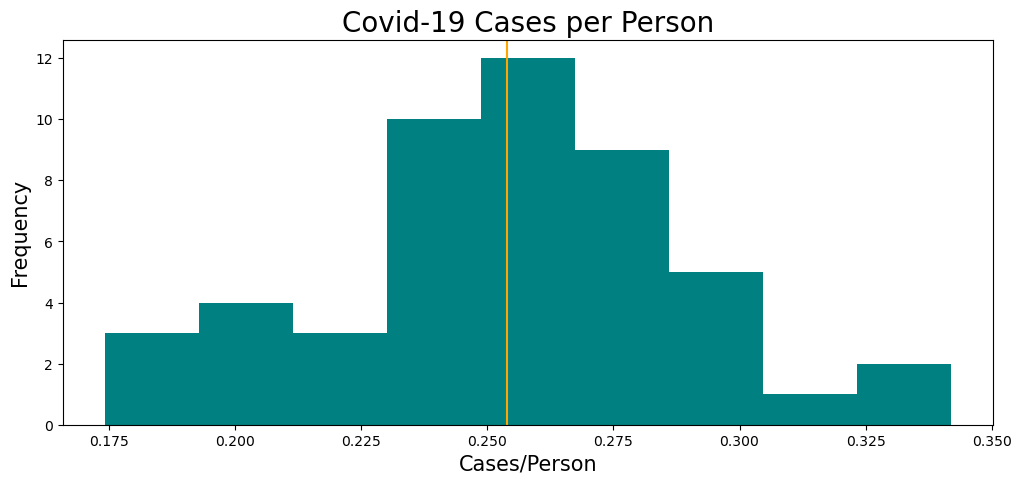

In [133]:
# Plot cases/person histogram

plt.figure(figsize = (12, 5))
plt.hist(final_cov_state['con_pop_rat'], bins = 'auto', color = 'teal')
plt.title('Covid-19 Cases per Person', size = 20)
plt.xlabel('Cases/Person', size = 15)
plt.ylabel('Frequency', size = 15)
plt.axvline(x = np.mean(final_cov_state['con_pop_rat']), color = 'orange')
plt.savefig('./images/cases_per_person_hist');

**Histogram shows normal distribution of states cases/person ratio with a mean cases/person ratio of just over 0.25.**

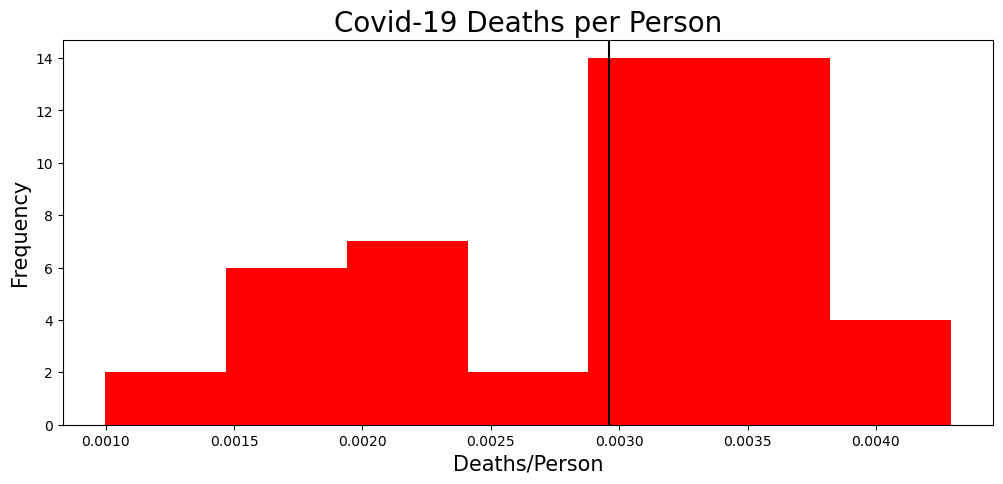

In [141]:
# Plot cases/person histogram

plt.figure(figsize = (12, 5))
plt.hist(final_cov_state['dec_pop_rat'], bins = 'auto', color = 'red')
plt.title('Covid-19 Deaths per Person', size = 20)
plt.xlabel('Deaths/Person', size = 15)
plt.ylabel('Frequency', size = 15)
plt.axvline(x = np.mean(final_cov_state['dec_pop_rat']), color = 'black')
plt.savefig('./images/deaths_per_person_hist');

**Histogram shows a left skew bimodal distribution with an average death/person ratio of just under 3 deaths for every 1000 people.**

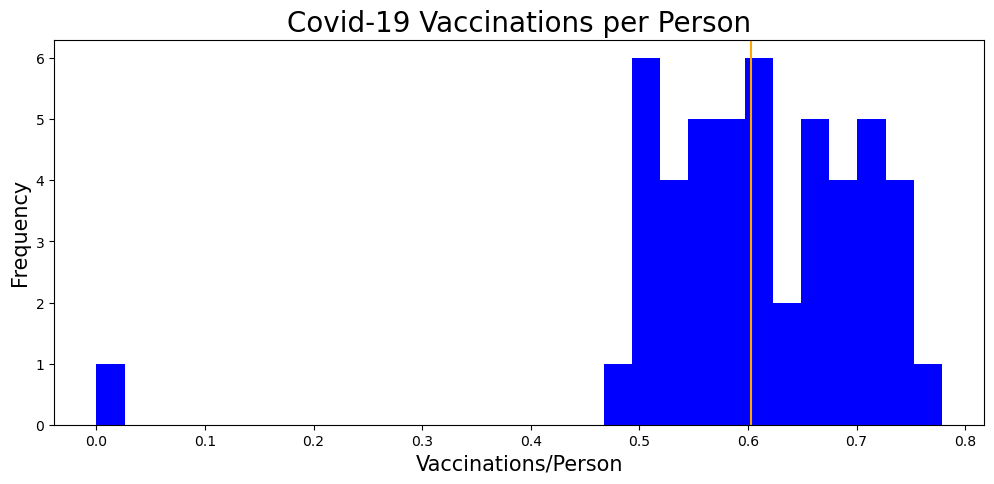

In [144]:
# Plot cases/person histogram

plt.figure(figsize = (12, 5))
plt.hist(final_cov_state['vax_pop_rat'], bins = 30, color = 'blue')
plt.title('Covid-19 Vaccinations per Person', size = 20)
plt.xlabel('Vaccinations/Person', size = 15)
plt.ylabel('Frequency', size = 15)
plt.axvline(x = np.mean(final_cov_state['vax_pop_rat']), color = 'orange')
plt.savefig('./images/vax_per_person_hist');

**Histogram shows bimodal distribution of states vaccinations/person ratio with a mean cases/person ratio of just over 0.6.  The one outlier is Hawaii with 0 reported cumulative vaccinations on 05-12-2022.  This is incorrect; further analysis revealed a maximum of 600 cumulative vaccinations over the analyzed time frame which is also incorrect.**

/Users/JR/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


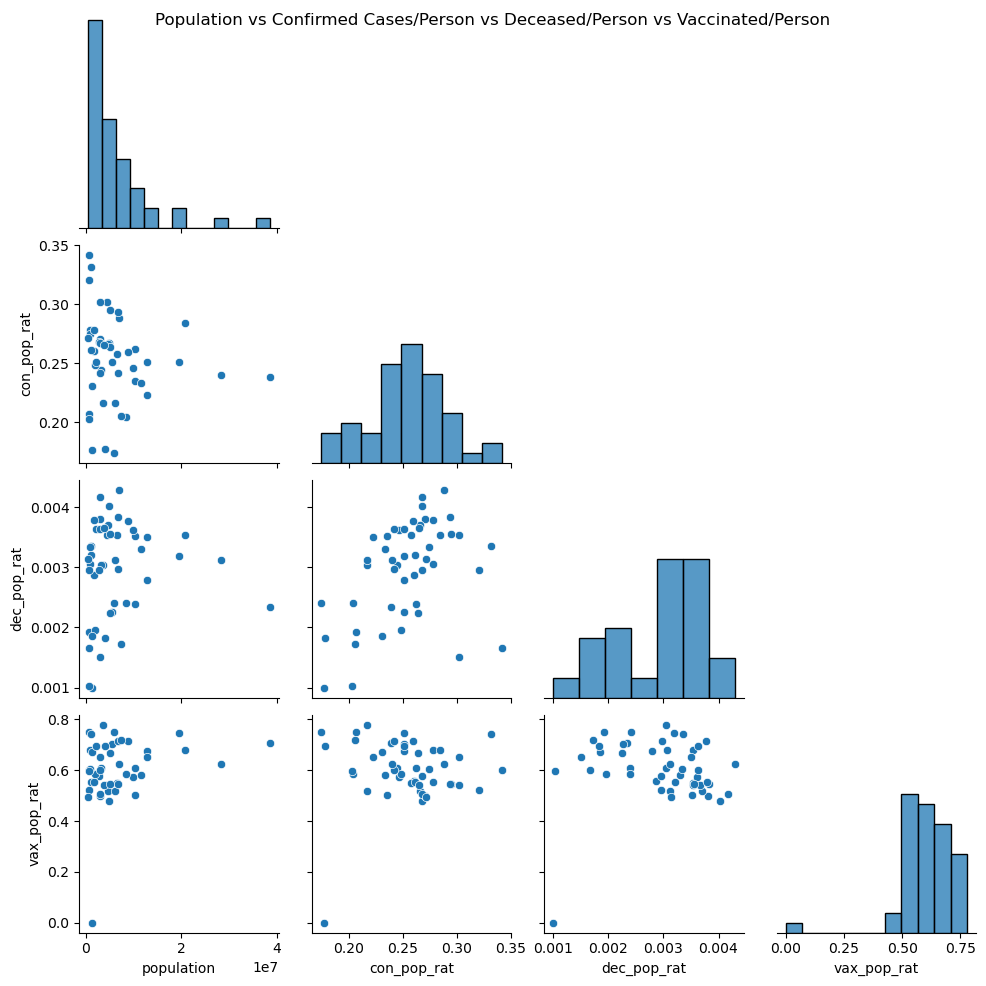

In [110]:
# Plot pairplot of population vs each of the ratio features

pp = sns.pairplot(final_cov_state[['population','con_pop_rat','dec_pop_rat', 'vax_pop_rat']], corner = True)
pp.fig.suptitle('Population vs Confirmed Cases/Person vs Deceased/Person vs Vaccinated/Person');

**The confirmed cases and deceased ratio scatter plot displays a positive linear relationship; as cases increase so do deaths.  The vaccinations vs confirmed cases and deceased plots show a very slight negative relationship; as vaccinations/person decreases, cases and deaths increase.**